<img src="images/bannerugentdwengo.png" alt="Banner" width="400"/>

<div>
    <font color=#690027 markdown="1">
        <h1>NUMERIEK BEPALEN VAN DE OPPERVLAKTE TUSSEN EEN KROMME EN DE X-AS</h1>
        <h2>De Riemannsom en de trapeziummethode</h2>
    </font>
</div>

<div class="alert alert-box alert-success"> 
In de wiskundeles leerde je de oppervlakte tussen een kromme en de x-as berekenen door integratiemethodes toe te passen. Hiervoor moet je echter heel wat formules gebruiken, en die zijn enkel van toepassing bij bepaalde types functies.<br>
Je leerde misschien ook dat je tot deze methodes kwam na het nemen van een limiet van een benadering van de gezochte oppervlakte.<br>  
In deze notebook zal je de oppervlakte bepalen door ze numeriek te benaderen met enkele rechthoeken of trapezia.
</div>

### Nodige modules importeren

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<div>
    <font color=#690027 markdown="1">
        <h2>1. Inleiding</h2> 
    </font>
</div>

In Python kan je een functievoorschrift ingeven m.b.v. het sleutelwoord `lambda`, op de manier die je ziet in de volgende code-cellen.

In [2]:
# funtie die geïntegreerd moet worden
f = lambda x: 100 * x ** 4 * (1 - x) ** 4 / (1 + x ** 2)            # f is functie met domein IR en nulwaarden 0 en 1

Merk op dat de grafiek van f de x-as raakt in 0 en 1 en voor de rest boven de x-as ligt.

In [3]:
f(3)

12960.0

In [4]:
x = np.arange(-7, 7, 0.01)          # NumPy-lijst van originelen aanmaken 
y = f(x)                            # NumPy-lijst van overeenkomstige beelden aanmaken   
print("x", x)
print("y", y)

x [-7.   -6.99 -6.98 ...  6.97  6.98  6.99]
y [19668992.         19513837.09243274 19359700.84107772 ...
  6046638.86288319  6105086.37259853  6164003.08415105]


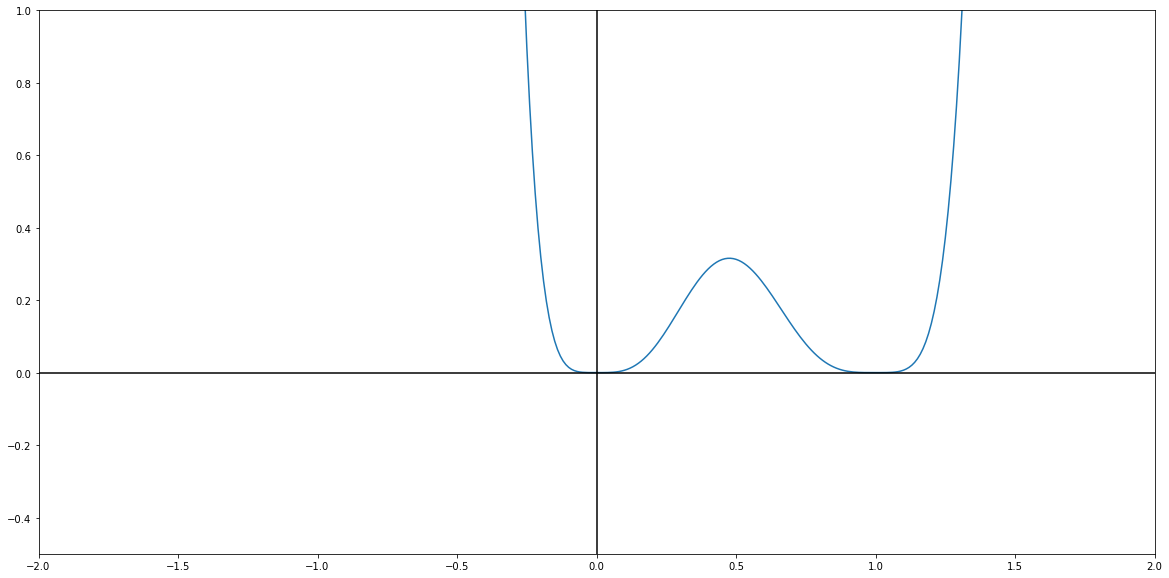

In [5]:
# grafiek
plt.figure(figsize=(20,10))

plt.axis(xmin=-2, xmax=2, ymin=-0.5, ymax=1)

plt.plot(x, y)

plt.vlines(0, -4, 50, color="black")  # y-as
plt.hlines(0, -10,10, color="black")  # x-as

plt.show()

<div>
    <font color=#690027 markdown="1">
        <h2>2. Riemannsom</h2> 
    </font>
</div>

### Voorbeeld
-  Zoek de oppervlakte tussen de kromme en de x-as over het interval [0,1], m.a.w. tussen de snijpunten met de x-as.

Je zal deze oppervlakte benaderen door een aantal rechthoeken. Je zal daarvoor een functie definiëren met als parameters de betreffende functie, het interval dat de grens van de oppervlakte bepaalt en het gewenste aantal rechthoeken. Hoe meer rechthoeken je gebruikt, hoe nauwkeuriger het resultaat zal zijn.

De oppervlakte van een rechthoek wordt gegeven door de formule:
$$ \text{lengte} . \text{breedte}$$

Stel dat je werkt over een interval [a, b]. De rechthoeken worden bepaald door de intervallen die men bekomt door [a, b] te verdelen in n delen. De breedte van een rechthoek komt overeen met de breedte van het interval, en is dus gelijk aan $\frac{b-a}{n}$.<br> 
Voor een rechthoek op [a,b] bijvoorbeeld $[x_{0},x_{1}]$  is de lengte dan $f(x_{0})$.

In [6]:
# formule oppervlakte rechthoek bepaald door x-as en twee punten op grafiek van f
def oppervlakte_rechthoek(f, h, a):
    """Berekent oppervlakte van rechthoek met hoekpunten (a, 0), (a, f(a)), (a + h, 0), (a + h, f(a))."""
    oppervlakte = f(a) * h    
    return oppervlakte

# definieer functie om oppervlakte tussen grafiek van f en x-as te benaderen over [a, b] a.d.h.v. n rechthoeken
def riemann(f, n, a, b):
    """Benadert de oppervlakte tussen de kromme bepaald door de functie f en de x-as over [a, b]."""
    h = (b-a)/n
    integraal = 0
    for i in range(1, n):
        integraal = integraal + oppervlakte_rechthoek(f, h , a + i * h)
    return integraal

In [7]:
# pas Riemannsom toe met 100 rechthoeken
print(riemann(f, 100, 0, 1))

0.12644892673714442


### Antwoord
De oppervlakte tussen de grafiek van f en de x-as over het interval [0,1] is bij benadering 0.12644892673714442.

### Opdracht 2.1
- Benader de oppervlakte tussen de grafiek van *f* en de x-as over het interval [0;1] met 10 rechthoeken.  

In [8]:
# voorbeeldcode
# pas Riemannsom toe met 10 rechthoeken
print(riemann(f, 10, 0, 1))

0.1264511092841115


### Opdracht 2.2
- Benader de oppervlakte tussen de kromme met vergelijking $y = x^3$ en de x-as over het interval $[1, 3]$ met 25 rechthoeken. 

In [9]:
# voorbeeldcode
# funtie die geïntegreerd moet worden
k = lambda x: x**3  

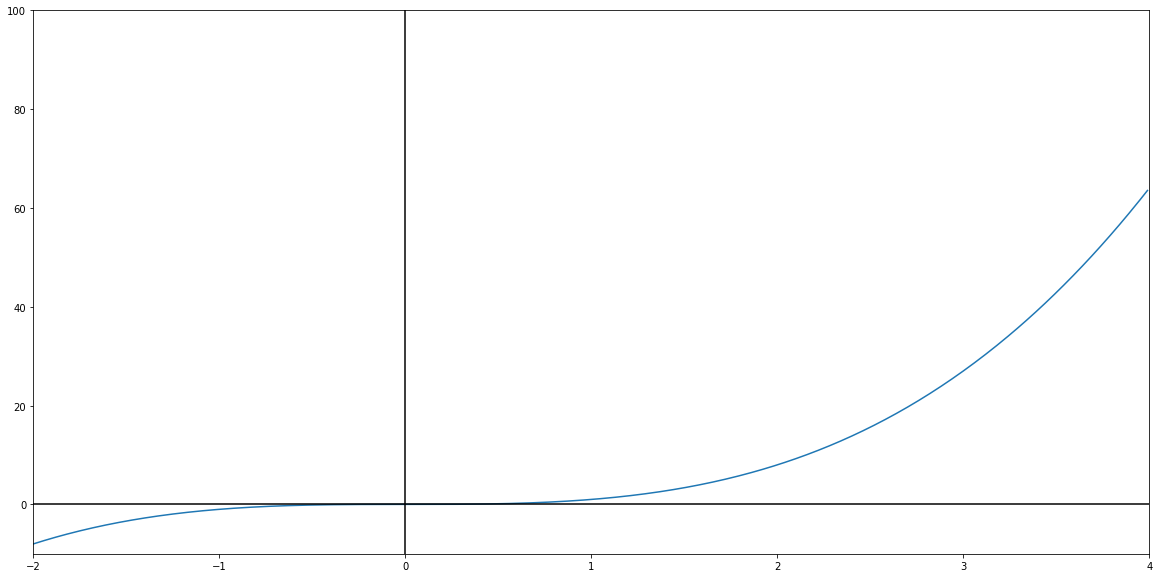

In [10]:
# grafiek
o = np.arange(-2, 4, 0.01)          # NumPy-lijst van originelen aanmaken 
b = k(o)                            # NumPy-lijst van overeenkomstige beelden aanmaken   

plt.figure(figsize=(20,10))

plt.axis(xmin=-2, xmax=4, ymin=-10, ymax=100)

plt.plot(o, b)

plt.vlines(0, -10, 100, color="black")  # y-as
plt.hlines(0, -2, 5, color="black")  # x-as

plt.show()

De grafiek van k heeft als (enige) nulwaarde 0.

In [11]:
# voorbeeldcode
# pas Riemannsom toe met 25 rechthoeken
print(riemann(k, 25, 1, 3))

18.8928


<div>
    <font color=#690027 markdown="1">
        <h2>3.Trapeziummethode</h2> 
    </font>
</div>

### Voorbeeld
-  Zoek de oppervlakte tussen de kromme en de x-as over het interval [0,1], m.a.w. tussen de snijpunten met de x-as.

Je zal deze oppervlakte benaderen door een aantal trapezia. Je zal daarvoor een functie definiëren met als parameters de betreffende functie, het interval dat de grens van de oppervlakte bepaalt en het gewenste aantal trapezia. Hoe meer trapezia je gebruikt, hoe nauwkeuriger het resultaat zal zijn.

De oppervlakte van een trapezium wordt gegeven door de formule:
$$ \frac{(\text{grote basis + kleine basis})\;\text{hoogte}}{2}$$

Stel dat je werkt over een interval [a, b]. De trapezia worden bepaald door de intervallen die men bekomt door [a, b] te verdelen in n delen. De hoogte van een trapezium komt overeen met de breedte van het interval, en is dus gelijk aan $\frac{b-a}{n}$.<br>
Voor een trapezium op bijvoorbeeld $[x_{0},x_{1}]$ zijn de basissen dan $f(x_{0})$ en $f(x_{1})$.

In [12]:
# formule oppervlakte trapezium bepaald door x-as en twee punten op grafiek van f
def oppervlakte_trapezium(f, h, a):
    """Berekent oppervlakte van trapezium met hoekpunten (a, 0), (a, f(a)), (a + h, 0), (a + h, f(a + h))."""
    oppervlakte = 0.5 * h * (f(a) + f(a + h))    
    return oppervlakte

# definieer functie om oppervlakte tussen grafiek van f en x-as te benaderen over [a, b] a.d.h.v. n trapezia
def trapezium(f, n, a, b):
    """Benadert de oppervlakte tussen de kromme bepaald door de functie f en de x-as over [a, b]."""
    h = (b-a)/n
    integraal = 0
    for i in range(1, n):
        integraal = integraal + oppervlakte_trapezium(f, h , a + i * h)
    return integraal

In [13]:
# pas trapeziummethode toe met 100 trapezia
print(trapezium(f, 100, 0, 1))

0.1264489219346446


### Antwoord
De oppervlakte tussen de grafiek van f en de x-as over het interval [0,1] is bij benadering 0.1264489219346446.

### Opdracht 3.1
- Benader de oppervlakte tussen de grafiek van *f* en de x-as over het interval [0,5;1] met 50 trapezia.  

In [14]:
# voorbeeldcode
print(trapezium(f, 50 , 0.5, 1)) 

0.05411080350293328


### Opdracht 3.2
- Benader de oppervlakte tussen de kromme met vergelijking $y = \sin x$ en de x-as over het interval $[0, \pi]$ met 50 trapezia. 

In [15]:
# voorbeeldcode
# funtie die geïntegreerd moet worden
g = lambda x: np.sin(x)                         

De grafiek van g is een sinusoïde met nulwaarden o.a. 0 en $\pi$.

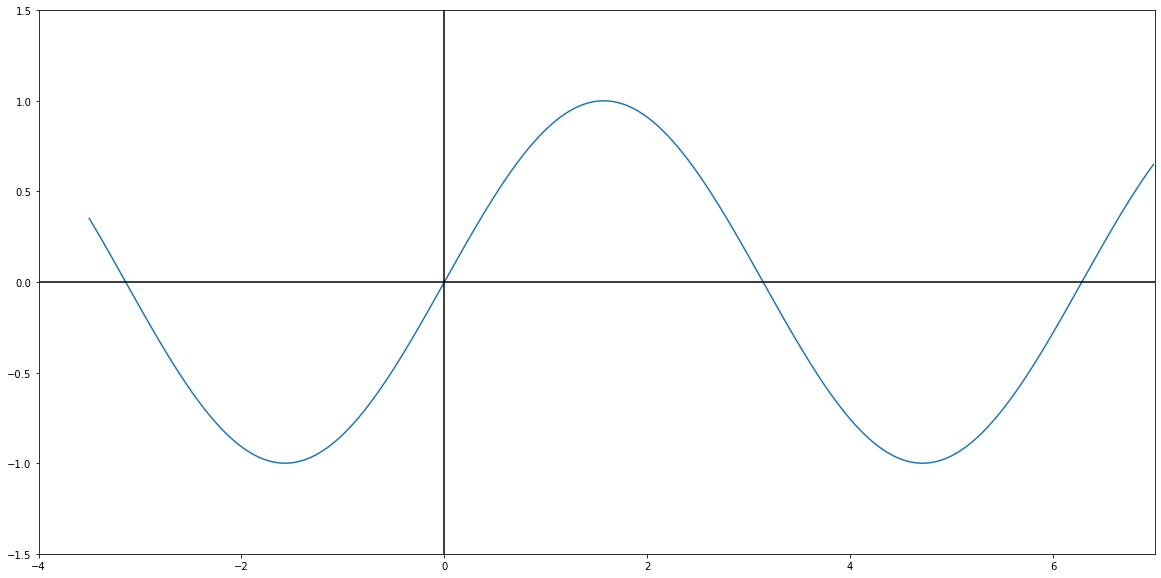

In [16]:
# grafiek
r = np.arange(-3.5, 7, 0.01)         # NumPy-lijst van originelen aanmaken 
s = g(r)                             # NumPy-lijst van overeenkomstige beelden aanmaken   

plt.figure(figsize=(20,10))

plt.axis(xmin=-4, xmax=7, ymin=-1.5, ymax=1.5)

plt.plot(r, s)

plt.vlines(0, -1.5, 1.5, color="black")  # y-as
plt.hlines(0, -4, 7, color="black")      # x-as

plt.show()

In [17]:
# voorbeeldcode
print(trapezium(g, 50 , 0, np.pi)) 

1.997369360727578


### Opdracht 3.3
- Benader de oppervlakte tussen de kromme met vergelijking $y = \sin x$ en de x-as over het interval $[\pi, 2\pi]$ met 50 trapezia. 

In [18]:
# voorbeeldcode
print(trapezium(g, 50, np.pi, 2 * np.pi)) 

-1.9973693607275778


Omdat de kromme in het interval $[\pi, 2\pi]$ onder de x-as ligt, geeft de functie een negatieve waarde terug. De oppervlakte wordt benaderd door de absolute waarde hiervan. 

In [19]:
# voorbeeldcode
getal = trapezium(g, 50, np.pi, 2 * np.pi) 
oppervlaktebenadering = abs(getal)
print(oppervlaktebenadering)

1.9973693607275778


### Opdracht 3.4
- Benader de oppervlakte tussen de kromme met vergelijking $y = \sin x$ en de x-as over het interval $[0, 2\pi]$ met 50 trapezia. 

In [20]:
# voorbeeldcode
opp1 = trapezium(g, 50, 0, np.pi) 
opp2 = abs(trapezium(g, 50, np.pi, 2 * np.pi))
print(opp1 + opp2)

3.994738721455156


<div>
    <font color=#000000 markdown="1">
        <h2>Referentielijst</h2>
    </font>
</div>

https://computation.physics.utoronto.ca/python-reference/learning-examples/numerical-integration/